In [1]:
import gym
import io
import base64
from IPython.display import HTML
import numpy as np
import random
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import Model
from keras.optimizers import Adam

In [2]:
env = gym.make('CartPole-v0')

In [3]:
OBS_S = env.observation_space.shape[0]
ACT_S = env.action_space.n

In [4]:
def cm():
    inp = Input((OBS_S))
    x = Dense(24, activation='relu')(inp)
    x = Dense(24, activation='relu')(x)
    x = Dense(ACT_S, activation='softmax')(x)    
    m = Model(inp, x)
    return m

In [5]:
def cross(m1, m2, mgf=cm):
    l = len(m1.get_weights()) // 2
    w = []
    for i in range(len(m1.get_weights())):
        if i < l:
            w.append(m1.get_weights()[i])
        else:
            w.append(m2.get_weights()[i])
    m = mgf() # function for model generation
    m.set_weights(w)
    return m

In [6]:
def mut(m, mu=0, sigma=0.1):
    m1 = cm(); m1.set_weights(m.get_weights())
    w = []
    for i in range(len(m1.get_weights())):
        ow = m1.get_weights()[i]
        nw = np.add(ow, np.random.normal(mu, sigma, size=(ow.shape)))
        w.append(nw)
    m1.set_weights(w)
    return m1

In [7]:
def pick(p, s, a):
    i = np.argmax(s)
    a.append(p[i])
    s[i] = -float('inf')

In [8]:
def play(pop):
    s = []
    env = gym.make('CartPole-v0')
    for i in range(len(pop)):
        obs = env.reset()
        tr = 0
        while True:
            a = np.argmax(pop[i].predict(obs.reshape(1, OBS_S)))
            obs, r, done, _ = env.step(a)
            tr += r
            if done:
                s.append(tr)
                break
    return s

In [9]:
PSZ = 20 # population size
MRT = .4 # mutation rate
EP = 50 # episodes

In [10]:
c = 0
pop = []
rm = []
for i in range(PSZ):
    pop.append(cm())
    
for i in range(EP):
    c += 1
    s = play(pop)
    print((c, np.max(s)))
    rm.append(np.max(s))
    if np.max(s) == 200 and i > 10:
        print('\n')
        print(f'CartPole solved after {c} episodes')
        break
    par = []
    for j in range(2):
        pick(pop, s, par)
    cr = cross(par[0], par[1])
    pop = []
    pop.append(par[0])
    pop.append(par[1])
    for j in range(PSZ-len(par)):
        r = random.random()
        if r < MRT:
            pop.append(mut(cr))
        else:
            pop.append(cr)

(1, 200.0)
(2, 120.0)
(3, 44.0)
(4, 81.0)
(5, 122.0)
(6, 145.0)
(7, 177.0)
(8, 132.0)
(9, 200.0)
(10, 200.0)
(11, 200.0)
(12, 200.0)


CartPole solved after 12 episodes


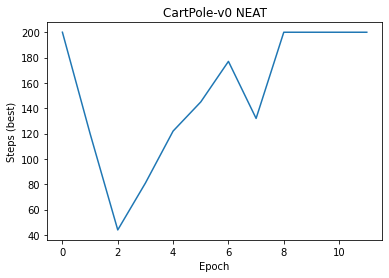

In [11]:
plt.plot(rm)
plt.title('CartPole-v0 NEAT')
plt.xlabel('Epoch')
plt.ylabel('Steps (best)')
plt.show()

In [12]:
m = pop[np.argmax(s)]

In [13]:
env = gym.make('CartPole-v0')
c = 0
for i in range(10):
    tr = 0
    obs = env.reset()
    c += 1
    while True:
        a = np.argmax(m.predict(obs.reshape(1, OBS_S)))
        obs, r, done, _ = env.step(a)
        tr += r
        if done:
            print((c, tr))
            break    

(1, 200.0)
(2, 200.0)
(3, 200.0)
(4, 200.0)
(5, 200.0)
(6, 200.0)
(7, 200.0)
(8, 200.0)
(9, 200.0)
(10, 200.0)
